## Importación de Librerías

In [172]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score





# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Cargue y Limpieza de los Datos

In [173]:
data_cruda = pd.read_csv('Produccion_Frutales_Valle_del_Cauca.csv')

In [174]:
data_cruda

,Municipios,Producto,Cantidad,año
0,Cali,Aguacate,15.0,2016
1,Cali,Banano,0.0,2016
2,Cali,Bananito,0.0,2016
3,Cali,Borojó,0.0,2016
4,Cali,Cítricos,161.0,2016
...,...,...,...,...
919,Zarzal,Papaya,174.0,2016
920,Zarzal,Piña,0.0,2016
921,Zarzal,Pitaya,0.0,2016
922,Zarzal,Tomate Arbol,0.0,2016


In [175]:
type(data_cruda)

pandas.core.frame.DataFrame

In [176]:
len(data_cruda)

924

In [177]:
data_cruda.columns #las columnas

Index(['Municipios', 'Producto', 'Cantidad', 'año'], dtype='object')

In [178]:
data_cruda.shape # se muestra el numero y filas y columnas del daset

(924, 4)

In [179]:
data_cruda['Municipios'].value_counts()

Municipios
Cali             22
San Pedro        22
La Unión         22
La Victoria      22
Obando           22
Palmira          22
Pradera          22
Restrepo         22
Riofrio          22
Roldanillo       22
Sevilla          22
Alcalá           22
Toro             22
Trujillo         22
Tuluá            22
Ulloa            22
Versalles        22
Vijes            22
Yotoco           22
Yumbo            22
La Cumbre        22
Jamundí          22
Guacarí          22
Ginebra          22
Andalucia        22
Ansermanuevo     22
Argelia          22
Bolivar          22
Buenaventura     22
Buga             22
Bugalagrande     22
Caicedonia       22
Calima Darién    22
Candelaria       22
Cartago          22
Dagua            22
El Aguila        22
El Cairo         22
El Cerrito       22
El Dovio         22
Florida          22
Zarzal           22
Name: count, dtype: int64

In [180]:
data_cruda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  924 non-null    object 
 1   Producto    924 non-null    object 
 2   Cantidad    924 non-null    float64
 3   año         924 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [181]:
data_cruda.dropna(inplace=True) ## elimina las filas faltantes y sobre escribe las filas originales

In [182]:
data_cruda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  924 non-null    object 
 1   Producto    924 non-null    object 
 2   Cantidad    924 non-null    float64
 3   año         924 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [183]:
data_cruda.describe()

,Cantidad,año
count,924.000000,924.0
mean,69.209782,2016.0
std,160.701620,0.0
min,0.000000,2016.0
25%,0.000000,2016.0
50%,0.000000,2016.0
75%,44.250000,2016.0
max,980.000000,2016.0


In [184]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data_cruda.shape}')
data_cruda.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data_cruda.shape}')

Tamaño del set antes de eliminar las filas repetidas: (924, 4)
Tamaño del set después de eliminar las filas repetidas: (924, 4)


In [185]:



data_cruda = data_cruda.astype({'Cantidad': 'float'})



In [186]:
data_pura  = data_cruda


## REGRESIÓN LINEAL 

In [187]:
data_pura_regresion = data_pura
data_pura_regresion

,Municipios,Producto,Cantidad,año
0,Cali,Aguacate,15.0,2016
1,Cali,Banano,0.0,2016
2,Cali,Bananito,0.0,2016
3,Cali,Borojó,0.0,2016
4,Cali,Cítricos,161.0,2016
...,...,...,...,...
919,Zarzal,Papaya,174.0,2016
920,Zarzal,Piña,0.0,2016
921,Zarzal,Pitaya,0.0,2016
922,Zarzal,Tomate Arbol,0.0,2016


<BarContainer object of 924 artists>

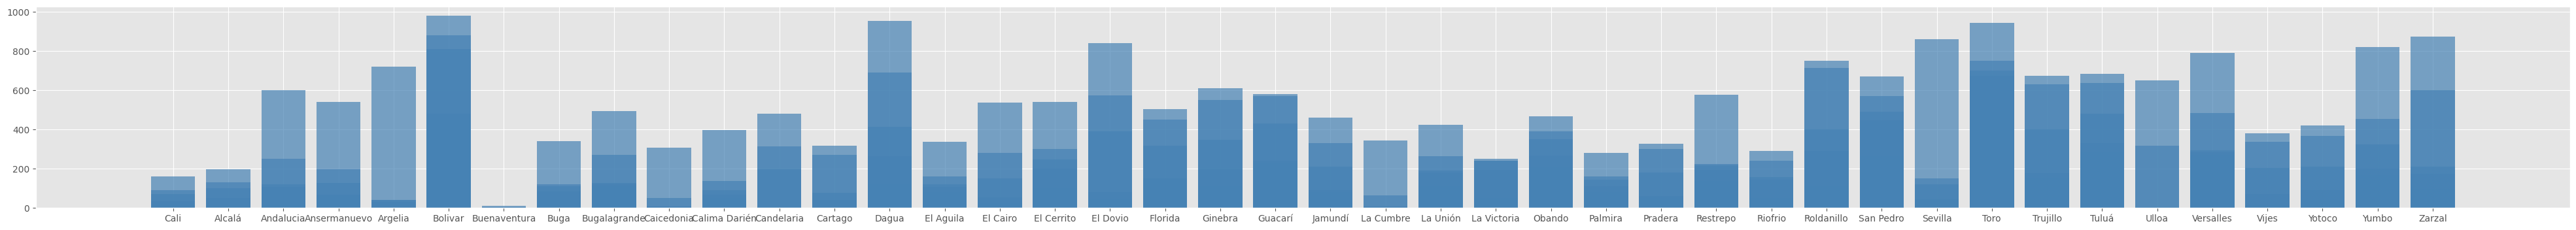

In [188]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(50, 4))
ax.bar(
    x    = data_pura_regresion['Municipios'],
    height = data_pura_regresion['Cantidad'],
    color   = 'steelblue',
    alpha   = 0.7,
    align   = 'center'
)

In [189]:
# División de los datos en train y test
# ==============================================================================
X = data_pura_regresion[['año']]
y = data_pura_regresion['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [190]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = data_pura_regresion['año'], y =  data_pura_regresion['Cantidad'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  nan
P-value:  nan


In [191]:
# División de los datos en train y test
# ==============================================================================
X = data_pura_regresion[['año']]
y = data_pura_regresion['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [192]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [193]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [68.96334235]
Coeficiente: [('año', 0.0)]
Coeficiente de determinación R^2: -2.3542498912565435e-06


In [194]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[68.96334235]
 [68.96334235]
 [68.96334235]]

El error (rmse) de test es: 161.52916727269263


In [195]:
# División de los datos en train y test
# ==============================================================================
X = data_pura_regresion[['año']]
y = data_pura_regresion['Cantidad']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [196]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                nan
Time:                        21:26:39   Log-Likelihood:                -4800.9
No. Observations:                 739   AIC:                             9604.
Df Residuals:                     738   BIC:                             9608.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0342      0.003     11.681      0.0

In [197]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[0.02845882, 0.03995719]])

In [198]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134
1,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134
2,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134
3,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134


In [199]:
X_train[:,0]

array([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 20

In [200]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 0]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
0,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134,2016,0.0
487,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134,2016,0.0
488,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134,2016,0.0
489,68.963342,5.903858,57.372986,80.553699,-246.328449,384.255134,2016,75.0


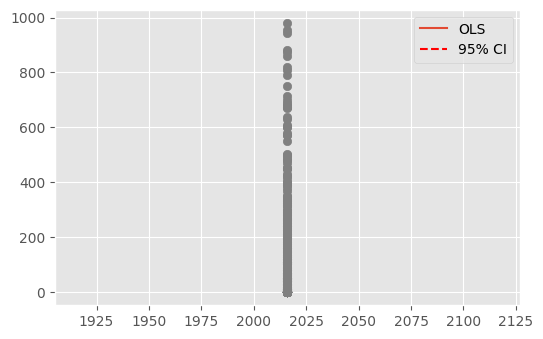

In [201]:

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [202]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 161.52916727269263


## CLASIFICACIÓN POR ARBOLES DE DESICIÓN 

In [203]:
data_pura_clasificacion = data_pura
data_pura_clasificacion

,Municipios,Producto,Cantidad,año
0,Cali,Aguacate,15.0,2016
1,Cali,Banano,0.0,2016
2,Cali,Bananito,0.0,2016
3,Cali,Borojó,0.0,2016
4,Cali,Cítricos,161.0,2016
...,...,...,...,...
919,Zarzal,Papaya,174.0,2016
920,Zarzal,Piña,0.0,2016
921,Zarzal,Pitaya,0.0,2016
922,Zarzal,Tomate Arbol,0.0,2016


In [204]:

data_pura_clasificacion['cantidades_altas'] = np.where(data_pura_clasificacion.Cantidad > 8, 0, 1)
# Una vez creada la nueva variable respuesta se descarta la original
data_pura_clasificacion = data_pura_clasificacion.drop(columns = 'Cantidad')

In [205]:
data_pura_clasificacion

,Municipios,Producto,año,cantidades_altas
0,Cali,Aguacate,2016,0
1,Cali,Banano,2016,1
2,Cali,Bananito,2016,1
3,Cali,Borojó,2016,1
4,Cali,Cítricos,2016,0
...,...,...,...,...
919,Zarzal,Papaya,2016,0
920,Zarzal,Piña,2016,1
921,Zarzal,Pitaya,2016,1
922,Zarzal,Tomate Arbol,2016,1


In [206]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_pura_clasificacion.drop(columns = 'cantidades_altas'),
                                        data_pura_clasificacion['cantidades_altas'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [207]:
preprocessor.named_transformers_['onehot']

OneHotEncoder(handle_unknown='ignore')

In [208]:
# Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

## CLUSTERING

In [ ]:
data_pura_clustering = data_pura
data_pura_clustering.head(4)

,Municipios,Producto,Cantidad,año,cantidades_altas
0,Cali,Aguacate,15.0,2016,0
1,Cali,Banano,0.0,2016,1
2,Cali,Bananito,0.0,2016,1
3,Cali,Borojó,0.0,2016,1


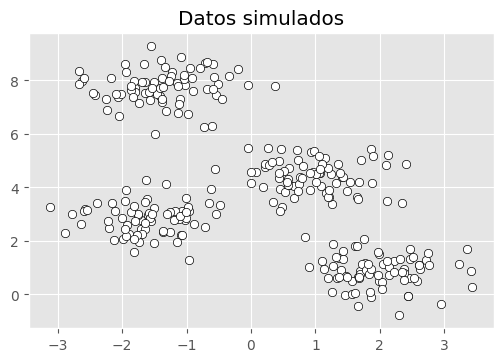

In [209]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [210]:
# Escalado de datos
# ==============================================================================
X_scaled = scale(X)

In [211]:
# Modelo
# ==============================================================================
X_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=123)

In [212]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

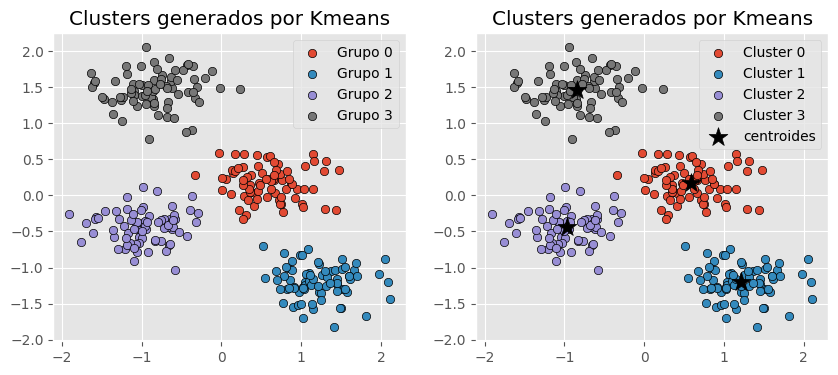

In [213]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [214]:
# Matriz de confusión: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,75,0,0,0
1,0,75,0,0
2,0,0,75,0
3,0,0,0,75


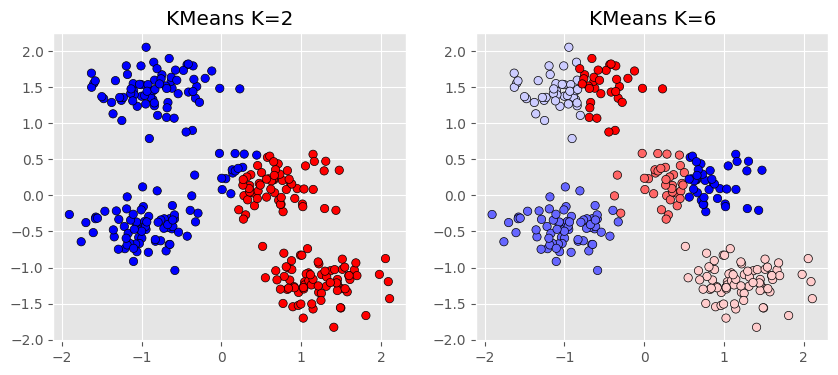

In [215]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

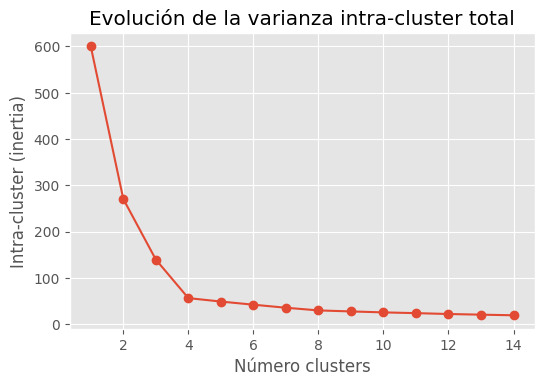

In [216]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

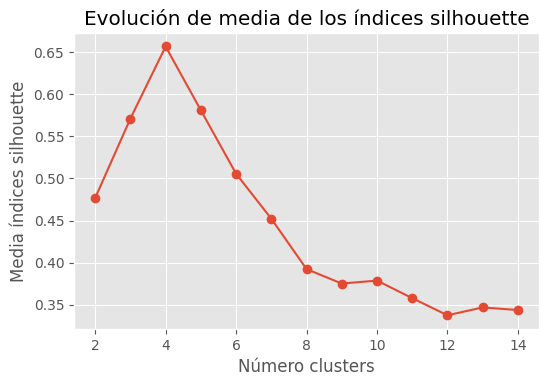

In [217]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## REGLAS DE ASOCIACIÓN

In [220]:
data_pura_reglas_asociacion = data_pura
data_pura_reglas_asociacion

,Municipios,Producto,Cantidad,año,cantidades_altas
0,Cali,Aguacate,15.0,2016,0
1,Cali,Banano,0.0,2016,1
2,Cali,Bananito,0.0,2016,1
3,Cali,Borojó,0.0,2016,1
4,Cali,Cítricos,161.0,2016,0
...,...,...,...,...,...
919,Zarzal,Papaya,174.0,2016,0
920,Zarzal,Piña,0.0,2016,1
921,Zarzal,Pitaya,0.0,2016,1
922,Zarzal,Tomate Arbol,0.0,2016,1
